In [32]:
def min_max_scaler(data):
    mn = min(data)
    mx = max(data)
    data -= mn
    data /= (mx-mn)
    return data

[2905.37691679 2905.39734896 2905.41778113 ... 2984.22281491 2984.24324676
 2984.2636787 ] 3357 bkjd
<class 'lightkurve.lightcurve.LightCurve'> <class 'lightkurve.targetpixelfile.KeplerTargetPixelFile'>
3197


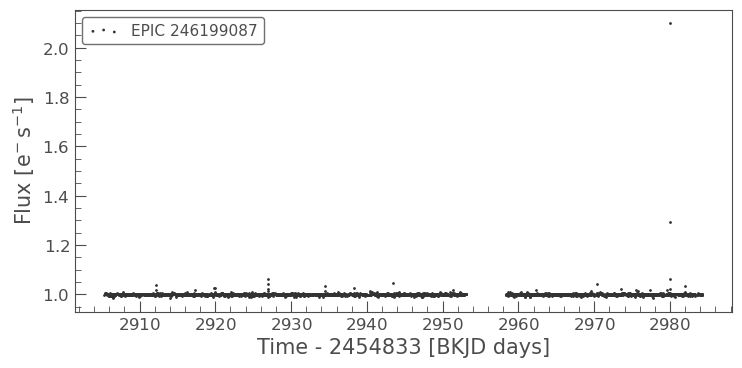

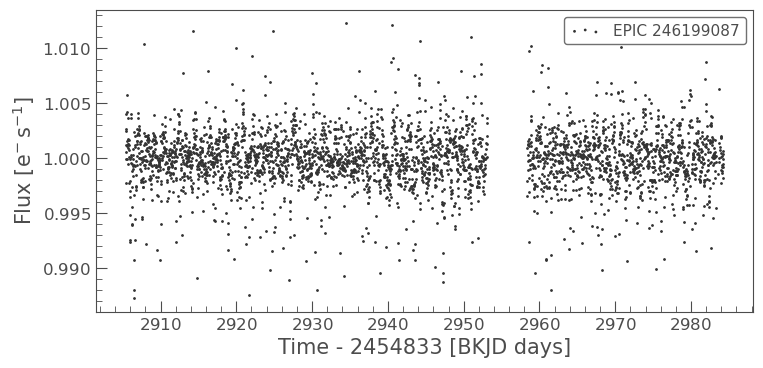

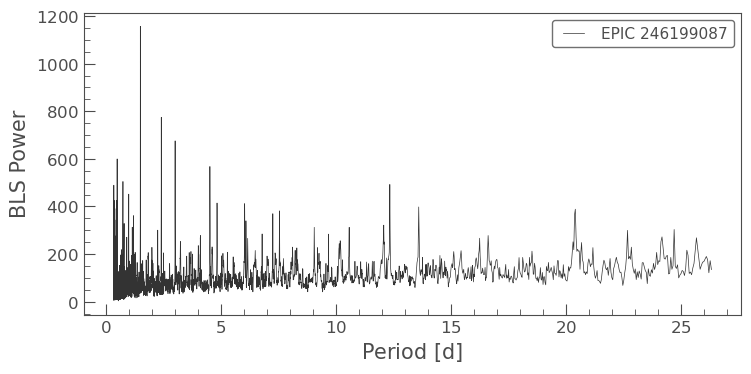

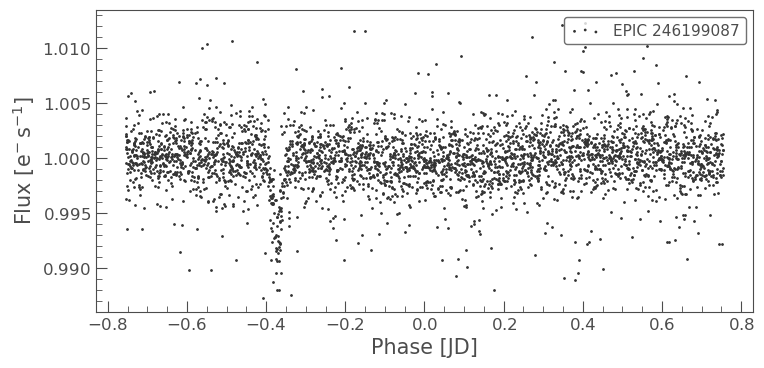

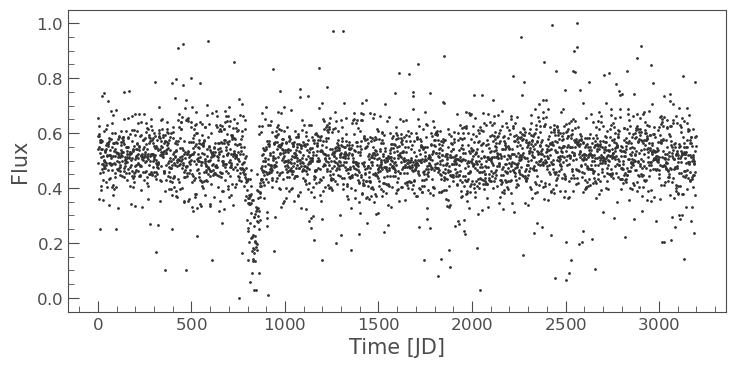

In [33]:
import lightkurve as lk
import pandas as pd

pixelfile = lk.search_targetpixelfile("Trappist-1")[1].download()
lc = pixelfile.to_lightcurve(method="pld")

print(lc.time.value,len(lc.time), lc.time.format)
lc = lc.flatten()
lc.scatter()
lc = lc.remove_outliers()
lc.scatter()
periodogram = lc.to_periodogram("bls")
periodogram.plot()
period = periodogram.period_at_max_power
lc = lc.fold(period)
lc.scatter()
lc = lk.LightCurve(time=range(0,3197), flux=min_max_scaler(lc.flux[:3197]))
lc.scatter()

print(type(lc), type(pixelfile))
print(len(lc.flux))

In [35]:
def search(periodogram, left_perc, right_perc):
    max_p = 0
    ass_p = 0
    periods = periodogram.period.value
    powers = periodogram.power.value
    delta = periods[len(periods)-1] - periods[0]
    left = periods[0] + delta*left_perc
    right = periods[len(periods)-1] - delta*right_perc
    for i in range(1,len(periods)):
        if(periods[i] > left and periods[i] < right):
            if(powers[i] > max_p):
                max_p = powers[i]
                ass_p = periods[i]
    return ass_p

3192
3192
1.0478537484108297
3192


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

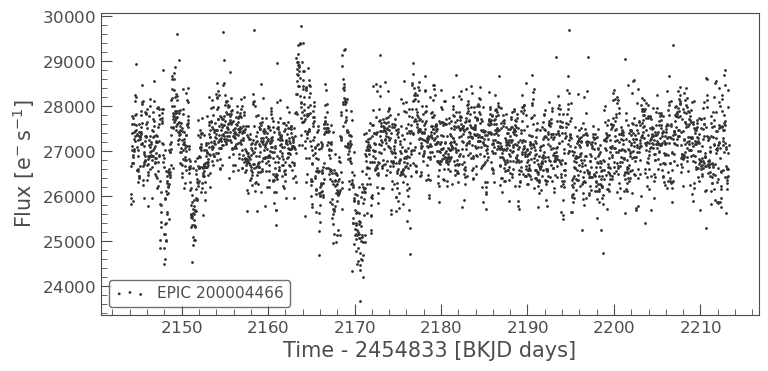

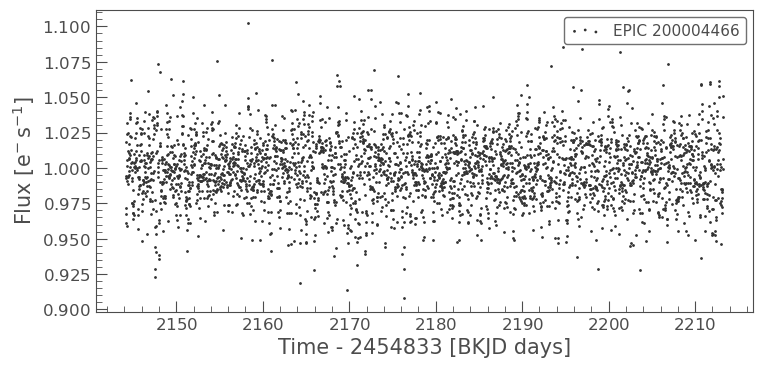

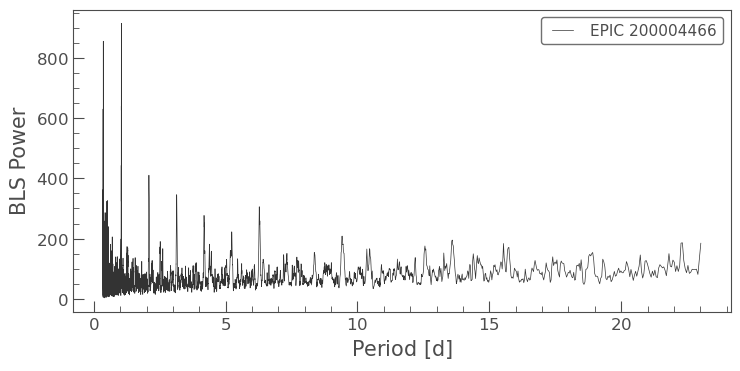

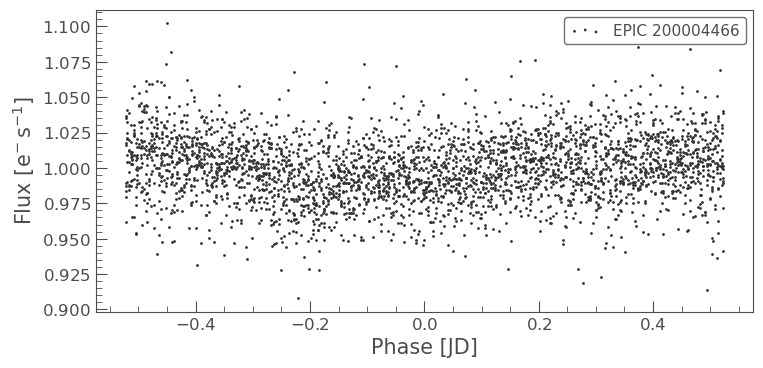

In [41]:
import lightkurve as lk
import pandas as pd
import numpy as np

ts = lk.read("k2.fits")
lc = lk.LightCurve(ts)
time = lc.time.value
print(len(lc.flux))


lc.scatter()
lc = lc.flatten()
#lc = lc.remove_outliers() #self explanatory
#lc.scatter()
#lc = lc.normalize(unit='ppm') #normalize
lc.scatter()
print(len(lc.flux))

periodogram = lc.to_periodogram("bls")
periodogram.plot()
#periodogram = periodogram.bin(binsize=10, method='mean') #possible helper
#periodogram.plot()

#need to trim values of period below .1%
#create search function to find larget period in between .5 and 8.5
period = search(periodogram, .01, .01)
print(period)
lc = lc.fold(period)
print(len(lc.flux))
lc.scatter()

In [40]:
import numpy as np
temp = np.array(lc.flux)
with open('Models/lk.npy', 'wb') as f:
    np.save(f, temp)
    
with open('Models/time.npy', 'wb') as f:
    np.save(f, time)